<span><a href="https://nbviewer.jupyter.org/github/ETCBC/Probabilistic_Language_Change/blob/master/analysis.ipynb?flush_cache=true">For best formatting view in NB viewer...</a></span>

<h1 align="center">Analysis Notebook:</h1>
<h2 align="center">A Probabilistic Approach to Linguistic Variation and Change in Biblical Hebrew</h2>

<br>

<table border="0">
    <tr>
        <th>Wido van Peursen</th>
        <th>Sandjai Bhulai</th>
        <th>Etienne van de Bijl</th>
        <th>Cody Kingham</th>
    </tr>
    <tr>
        <td>
            <a href="https://research.vu.nl/en/persons/wido-van-peursen"><img src="images/peursen_wido_van.jpg"></a>
        </td>
        <td>
            <a href="https://research.vu.nl/en/persons/s-bhulai"><img src="images/bhulai_sandjai.jpg"></a>
        </td>
        <td>
            <a href="https://nl.linkedin.com/in/etienne-van-de-bijl-68796218"><img src="images/bijl_etienne_vande.jpg"></a>
        </td>
        <td>
            <a href="http://www.codykingham.com"><img src="images/kingham_cody.jpg"></a>
        </td>
    </tr>
</table>

<table border="0">
    <tr>
        <td>
            <a href="http://networkinstitute.org/projects/a-probabilistic-approach-to-linguistic-variation-and-change-in-biblical-hebrew/">
                <img src="images/network_institute.png" height=80 width=232>
            </a>
        </td>
        <td>
            <a href="http://www.etcbc.nl">
                <img src="images/etcbc_logo.png" height=80 width=232>
            </a>
        </td>
        <td>
            <a href="https://science.vu.nl/en/index.aspx">
                <img src="images/science_logo.png" height=54.5 width=215>
            </a>
        </td>
    </tr>
</table>

<br>

## Research Question 

In this notebook we gather and analyze data on linguistic tendencies accross select books in the Hebrew Bible. Our primary research question is: 
> **Can we cluster books of the Hebrew Bible based solely on linguistic state changes at the phrase and word levels?**

A linguistic state change is any shift from one kind of linguistic unit to another when reading a text sequentially. An example is a shift from a `subject` phrase to a `predicate` phrase function. Another example is a shift from a `noun` to a `verb`. Traditionally Hebrew linguists have analyzed tendencies amongst select states, especially `subject`, `verb`, `object` ("SVO" or "VSO") (CITATION). These analyses may focus mainly on certain clause types (CITATION). Our analysis looks at any two state changes across phrase and word types. Specifically, we look at transitions in word type via part of speech and phrase type via function and phrase type. The potential values for these sets of features can be seen in the ETCBC's [BHSA documentation](https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html).

This research question is significant for three reasons. First, Hebraists often disagree about the scope of difference between linguistic usage between various Hebrew books (CITATION). By testing whether linguistic patterns like state changes yield detectable differences, we can determine how syntax varies and changes within the corpus. Second, Hebraists commonly rely on telling morphological or lexical tendencies to classify the language of Hebrew books. Yet, this approach only takes into account a limited aspect of language use and does not look at subtle syntactic differences. But identifying these differences and classifying books based on them, we can obtain more robust categories for the books of the Hebrew Bible. Third, since the current methods of classification often focus on a limited range of features, it is important to test whether a syntactic analysis confirms the groupings of the literature. Traditional scholarship divides books into two broad classes: Late Biblical Hebrew (LBH) or Standard Biblical Hebrew (SBH). Scholars still debate the classification of books such as Ruth or Jonah. For this study, we exclude books with questionable classification in order to test the validity of the traditional groups. If we cannot falsify the traditional classes, then our model can in the future serve as a baseline against which to measure debateable books. 

## Methodology

In this project, we test the following books and their traditional classification:

| Class | Books                                                                                         |
|-------|-----------------------------------------------------------------------------------------------|
| Standard Biblical Hebrew   | Genesis, Exodus, Leviticus, Deuteronomy, Joshua, Judges, 1 Kings, 2 Kings, 1 Samuel, 2 Samuel |
| Late Biblical Hebrew   | Song of Songs, Ecclesiastes, Esther, Ezra, Nehemiah, 1 Chronicles, 2 Chronicles               |

We divide every book into narrative and quotation clauses, using the ETCBC labelings. The classification of narrative versus quotation is called the `domain` in the database. Thus, for each book, we test two domains. Within each domain (narrative vs. quotation) we look at bigrams in word or phrase types. A bigram is a selection of two given units (word or phrase) within the clause. The diagram below illustrates [phrase function](https://etcbc.github.io/bhsa/features/hebrew/c/function.html) bigrams and how they're delineated in Genesis 1:1.

<img align="center" src="images/gen1.1_bigrams.png" height="50%" width="50%">

Above, each rectangle represents a separate bigram which is counted in our dataset. For this example, then, there are three bigrams. The counts would be made in our dataset accordingly:

<h4 align="center">Phrase Function Transitions in Genesis 1:1</h4>

|      bigram        |  count |
|--------------|---|
| Time -> Pred | 1 |
| Pred -> Subj | 1 |
| Subj -> Objc | 1 |

We do this for every clause per domain (narrative and quotation) and count each bigram individually. That is the first step. But these counts alone cannot tell us much about language properties.

Our research question asks whether these bigrams can be modeled as properties of language. That is, can sequential progressions of linguistic labels at the clause-level function as indicators of linguistic tendencies. And furthermore, can these tendencies be used to classify and cluster books in the Hebrew Bible? If so, what do the results suggest about traditional groupings?

The idea of language "tendencies" implies a theory of probability. That is, when language users employs different styles or dialects, the probability that a certain linguistic form is followed by another is different. These probabilities of sequence can be modeled using the statistical concept of a Markov chain. A Markov chain models the probability of particular changes in a situation based on a starting point. One can imagine the predictive text of a mobile phone, which suggests probable words based on what is being typed. Markov chains are frequently utilized in the financial world to predict changes in the market. In a Markov chain, situations are called "states." A shift from one state to another is known as a state transition. The likelihood of a certain state transition is called the transition probability. The diagram below illustrates a hypothetical Markov chain for market :

<a href="https://en.wikipedia.org/wiki/Markov_chain"><img align="center" src="images/markov_example_wikipedia.png"></a>

The chart shows three possible market states: a 'bull market', a 'bear market', or a 'stagnant market'. Based on past data of changes in the market, the chart shows the likelihood of arriving at any of these three states from another state. Imagining that we are in a bull market, we see that there is a very high probability, 0.9 (or 90%) that we remain in a bull market. On the other hand, there is a much smaller chance, 0.075 (or 7.5%) that we enter a bear market. Since these probabilities are calculated on past data, they tell us something about the tendencies of this given market. One could imagine, however, that these numbers would vary depending on the specific market in question. For example, perhaps this chart models the New York Stock Exchange, but in the Euronext Stock Exchange (Amsterdam) the likelihood of going from a bull market to a bear market is lower, say at 0.05 (5%). This might have further implications for how one plans to invest their money, because the data says something about the market's behavior and discrete properties.

In the same way, we can model the tendencies of a language and its constituent parts through a Markov chain. This statistical method is already used widely in the Natural Language Processing world for machine generated translations, morphological parsing, and word-sense disambiguation (CITATION). At the same time, Hebraists have long guessed that sequentiality says something about language tendency. Studies of Classical Hebrew often examine the way in which subject, verb, and object phrases order themselves around each other. These analyses are further used as indicators of diachronic change in Hebrew, with proposals that Hebrew gradually shifted from a verb-subject-object language (VSO) to a subject-verb-object (SVO) language. 

These manual approaches are inherently limited, though, in their ability to measure all phrase types. Indeed, subject, verb, and objects are key to a sentence's syntax. But the manual approach does not take into account the interaction of other interesting phrase functions such as adverbial or adjectival phrases. Furthermore, there is a basic assumption that indeed subject, verb, and object phrases present the strongest indicators of linguistic change. But perhaps other, more subtle, indicators might show key differences? Finally, there is an inherent limitation in terms of the number of potential transitions which can be considered by a focused, manual approach. By the ETCBC database's setup, there are [thirty different phrase function labels](https://etcbc.github.io/bhsa/features/hebrew/c/function). Thus, to consider all possible combinations of these labels, one would have to individully examine 900 different patterns (30x30), punching pattern searches into a software program and sorting through the significance of each one. The Markov chain method, however, enables all of these patterns to be considered simultaneously, so that the most relevant differences can be seen and analyzed.

Expanding on the example of Genesis 1:1, we can illustrate a primitive markov model based on that verse alone, which contains only three transitions: `Time -> Pred`, `Pred -> Subj`, and `Subj -> Objc`. Assuming our model has only "seen" this sentence, our Markov diagram would look as follows:

<img align="center" src="images/markov_gen1.png" height="30%" width="30%">

Based on the limited data of Genesis 1:1, the probability of transitioning from any of these states to the other is 1 or 100%. This is due to the limited data of the model. The value of such a small-scale model is limited to this passage, and its predictive power for unseen data is likely to be low. But with the addition of more sentences, the model encapsulates more of the language's tendencies. For instance, if we add the transitions of Genesis 1:2 (first sentence only), we expand the model with three additional types of transitions:

<img align="center" src="images/Gen1.2_bigrams.png" height="50%" width="50%">

<h4 align="center">Transitions in Genesis 1:1 + 1:2a</h4>

|      bigram        |  count |
|--------------|---|
| Time -> Pred | 1 |
| Pred -> Subj | 1 |
| Subj -> Objc | 1 |
| Conj -> Subj | 1 |
| Subj -> Pred | 1 |
| Pred -> PreC | 1 |

<br>

Two beginning states are now moderated with the new data: the `predicate` and `subject` state, which are contained in both Gen 1:1 and 1:2a. The new model reflects these changes:

<img align="center" src="images/markov_gen1.1.2.png" height="35%" width="35%">

When starting in the `Pred` state, now, there is a 0.5 (or 50%) probability of transitioning into a `Subj` state or a `PreC` (predicate complement) state. Likewise, there is a 50% chance of transitioning from a `Subj` state into either an `Objc` or a `Pred`. The addition of new data such as additional phrase functions and transitions results in a model with increasing sophistication.

## Research Design

We perform the data selection and analysis using Python. For all of our analysis we use the Hebrew syntactic data provided by the [Eep Talstra Centere for Bible and Computer](http://www.etcbc.nl) (ETCBC), a research group in the [Faculty of Religion and Theology](https://www.godgeleerdheid.vu.nl/en/research/institutes-and-centres/eep-talstra-centre-for-bible-and-computer/index.aspx) at the Vrije Universiteit Amsterdam. This is provided through the [Biblia Hebraica Stuttgartensia Amstelodamensis](https://etcbc.github.io/bhsa/) (BHSA), an export of the ETCBC database in a format which can be easily processed in Python. Specifically, the data format is [Text-Fabric](https://dans-labs.github.io/text-fabric/) ([Dirk Roorda](https://github.com/dirkroorda) at DANS Labs) which likewise has an accompanying Python package for selecting and processing data.

In [1]:
# import standard libraries
import os, collections
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from scipy.cluster import hierarchy
from scipy.spatial.distance import euclidean, pdist, squareform
from sklearn.metrics import silhouette_score, pairwise_distances
import seaborn as sns
os.sys.path.append('project_code') # project code modules
from project_code.data.bhsa import * # load BHSA Hebrew syntax data 
from project_code.markov.Markov_Chain import * # custom methods for Markov transitions
from clustering.Clustering_analysis import * # custom methods for cluster analysis
from clustering.Kmediods import *

main_dataset = get_data(books=lbh_books+sbh_books) # generate the dataset
experimental = get_data(books=lbh_books+sbh_books+test_books)

**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/2017/0_home.html" title="BHSA feature documentation">Feature docs</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/Bhsa/" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/" title="text-fabric-api">Text-Fabric API 5.6.1</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/#search-templates" title="Search Templates Introduction and Reference">Search Reference</a>

### Adapting ETCBC Data for Markov Analysis

The data of the ETCBC

In [2]:
features_unique = collections.defaultdict(dict)
x_features_unique = collections.defaultdict(dict)

# make count of unique values in dataset?

for dataset, features in ((main_dataset, features_unique), (experimental, x_features_unique)): # do for both main data and experimental
    for feature, domains in dataset.items():
        unique_values = set()
        for domain, books in domains.items():
            for book, clauses in books.items():
                feature_values = set(chain(*clauses))
                unique_values = unique_values | feature_values
        features[feature] = list(unique_values)
    
unique_counts = dict((feature, len(values)) for feature, values in features_unique.items())
unique_counts

{'clause_types': 42,
 'phrase_functions': 29,
 'phrase_types': 13,
 'word_pos': 14}

We put the unique counts in the table below. On the right, we see the size of the matrix according to the transitions that can occur. We observe that the biggest number of unique transitions is for clause-types.

| Feature          | Unique features | Unique Bigram Transitions |
|------------------|-----------------|---------------------------|
| Clause_types     | 42              | 42*42 = 1764              |
| Phrase_functions | 29              | 29*29=841                 |
| Phrase_types     | 13              | 13*13=160                 |
| Word_pos         | 14              | 14*14-196                 |

In the next figure, we see the average number of items per feature and domain level.

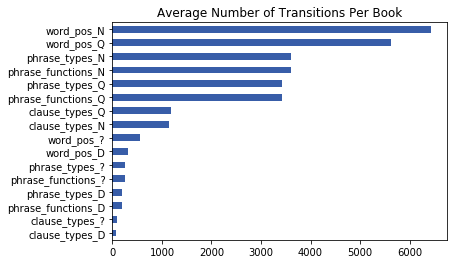

In [3]:
samples_ = collections.defaultdict(dict) # put counts here

# make the counts
for feature in dataset.keys():
    for domain in dataset[feature].keys():
        for book in dataset[feature][domain].keys():
            items = dataset[feature][domain][book]            
            samples_[feature+"_"+domain][book] = len(list(chain(*items)))
                
# dataframe and plot
df_samples = pd.DataFrame(samples_).fillna(0).mean(0).sort_values()
df_samples.plot(kind="barh", title="Average Number of Transitions Per Book", color='#385DA8')

We see that the ? and D domains have the lowest average number of transitions per book. As it is required to have enough data points to make realistic transition probabilities estimations for a Markov Chain, we will exclude these domains moving forward. Our dataset will thus consist of the N and Q domains for the features word_pos, phrase_functions and phrase types.

Explaining this choice further, clause types has 1764 unique transitions. Yet, we also have about 1200 average transitions per book. The data is thus too sparse to make reliable estimations of probability since on average, there would be 1.1 number of transitions possible.

We apply the same logic to our chosen domains of `narrative` and `quotation`. Within those groups we remove the books with 100 or less items. In the code below we enact these changes to the dataset.

In [4]:
print('removing clause_types...')
del main_dataset["clause_types"]
del experimental["clause_types"]

print('removing D and ? domains...')
for dataset in (main_dataset, experimental):
    for f in dataset.keys():
        del dataset[f]["D"]
        del dataset[f]["?"]

removelist = []
ex_removelist = []

for dataset, rlist in ((main_dataset, removelist), (experimental, ex_removelist)):
    for f in dataset.keys():
        for d in dataset[f].keys():
            for b in dataset[f][d].keys():
                n = samples_[f+"_"+d][b]
                if n < 100:
                    rlist.append([f,d,b,f'samples: {n}'])

print('to be removed due to sample sizes:')
print('\n'.join(f'\t{rem}' for rem in removelist))
                
for i in removelist:
    del dataset[i[0]][i[1]][i[2]]          

select_features = ['phrase_functions', 'phrase_types', 'word_pos']
select_domains = ['N', 'Q']

removing clause_types...
removing D and ? domains...
to be removed due to sample sizes:



Below we print out the total attested clauses in our remaining dataset. The first item is the feature type, followed by `N` (for narrative in a book) or `Q` (quotation). This is followed by the book names and the attested clauses in the dataset.

In [5]:
for data_type, domains in main_dataset.items():
    print(f'{data_type}')
    for domain, books in domains.items():
        print(f'\t{domain}')
        for book, clauses in books.items():
            print(f'\t\t{book} - {len(clauses)} clauses')

phrase_functions
	N
		Esther - 421 clauses
		Daniel - 237 clauses
		Ezra-Nehemiah - 943 clauses
		Chronicles - 2267 clauses
		Genesis - 3042 clauses
		Exodus - 1219 clauses
		Leviticus - 180 clauses
		Deuteronomy - 480 clauses
		Joshua - 1212 clauses
		Judges - 1689 clauses
		Samuel - 3496 clauses
		Kings - 2914 clauses
	Q
		Esther - 206 clauses
		Daniel - 455 clauses
		Ezra-Nehemiah - 519 clauses
		Chronicles - 816 clauses
		Genesis - 2422 clauses
		Exodus - 2010 clauses
		Leviticus - 2066 clauses
		Deuteronomy - 2591 clauses
		Joshua - 784 clauses
		Judges - 998 clauses
		Samuel - 2899 clauses
		Kings - 1791 clauses
phrase_types
	N
		Esther - 421 clauses
		Daniel - 237 clauses
		Ezra-Nehemiah - 943 clauses
		Chronicles - 2267 clauses
		Genesis - 3042 clauses
		Exodus - 1219 clauses
		Leviticus - 180 clauses
		Deuteronomy - 480 clauses
		Joshua - 1212 clauses
		Judges - 1689 clauses
		Samuel - 3496 clauses
		Kings - 2914 clauses
	Q
		Esther - 206 clauses
		Daniel - 455 clauses
		Ezra-

A sample of each dataset is provided below. In the sample, we print the gathered feature strings for the first two clauses in the book. Each embedded list (items between square brackets) represents a clause. A book is a list of these clause lists. Indices for the abbreviated features' corresponding  values can be found in the following links: [phrase_functions](https://etcbc.github.io/bhsa/features/hebrew/c/function), [phrase_types](https://etcbc.github.io/bhsa/features/hebrew/c/typ), [word_pos](https://etcbc.github.io/bhsa/features/hebrew/c/pdp) (phrase-dependent).

N.B. that the first phrase functions in Genesis do not match our example illustrations above for Genesis 1:1 (i.e. `['Time', 'Pred', 'Subj', 'Objc']`). This is because this sentence has a domain label of `?` in the ETCBC and is thus excluded from our dataset. The first sentence, then, is from the beginning of Genesis 1:3, the first clause marked as `N` (narrative). 

In [6]:
for data_type, domains in main_dataset.items():
    print(f'{data_type}')
    for domain, books in domains.items():
        print(f'\t{domain}')
        for book, clauses in books.items():
            print(f'\t\t{book} - {clauses[:2]}')

phrase_functions
	N
		Esther - [['Conj', 'Pred', 'Time'], ['Subj', 'PreC']]
		Daniel - [['Conj', 'Pred', 'Cmpl'], ['Conj', 'Pred', 'Subj', 'Cmpl', 'Objc']]
		Ezra-Nehemiah - [['Conj', 'Pred', 'Subj', 'Cmpl'], ['Pred', 'Subj', 'Objc']]
		Chronicles - [['Conj', 'Pred', 'Subj', 'Objc'], ['Subj', 'PreC']]
		Genesis - [['Conj', 'Pred', 'Subj'], ['Conj', 'Pred', 'Subj']]
		Exodus - [['Conj', 'Pred', 'Subj', 'PreC'], ['Conj', 'Subj', 'Pred', 'PreC']]
		Leviticus - [['Conj', 'Pred', 'Cmpl'], ['Conj', 'Pred', 'Subj', 'Cmpl', 'Loca']]
		Deuteronomy - [['Conj', 'Pred'], ['Time', 'Time', 'Time', 'Pred', 'Subj', 'Cmpl', 'Adju']]
		Joshua - [['Conj', 'Pred', 'Time'], ['Conj', 'Pred', 'Subj', 'Cmpl']]
		Judges - [['Conj', 'Pred', 'Time'], ['Conj', 'Pred', 'Subj', 'Cmpl']]
		Samuel - [['Conj', 'Pred', 'Subj'], ['Conj', 'Subj', 'PreC']]
		Kings - [['Conj', 'PreO', 'Cmpl'], ['Conj', 'Pred', 'Cmpl', 'Subj']]
	Q
		Esther - [['Adju', 'Subj'], ['Pred', 'Cmpl']]
		Daniel - [['PreC', 'Subj', 'Objc'], ['Rela',

## Gathering Transition Probabilities

Having now prepared and inspected our dataset, we will now construct Markov transition probabilities using the feature transitions within clauses. Clauses are grouped together by their domain and book (see above). The code below iterates through each domain, book, and clause in the dataset. As the code moves into and out of each clause, it adds a `Clause_End` and `Clause_Begin` feature. Adding these features allows us to consider the probability of a clause ending or beginning at a given feature state within a given book. The final transition counts are stored in a transition matrix, mapped to to the `feature`, `domain`, and `book` of the counts using embedded dictionaries. The purpose and structure of a transition matrix is explained further below.

In [7]:
m_dataset_trans = collections.defaultdict(dict)
m_dataset_MC = collections.defaultdict(dict)
x_dataset_trans = collections.defaultdict(dict) # experimental books
x_dataset_MC = collections.defaultdict(dict)

for dataset, dataset_trans, dataset_MC in ((main_dataset, m_dataset_trans, m_dataset_MC), (experimental, x_dataset_trans, x_dataset_MC)): # both main and experimental data
    for feature in dataset.keys():
        for domain in dataset[feature].keys():
            df = dataset[feature][domain]
            transMatrix = transitionMatrix(df, clause_states=True) # apply custom function to measure bigrams
            dataset_trans[feature][domain] = transMatrix 
            dataset_MC[feature][domain] = MCTransformation(transMatrix)

A sample transition matrix is displayed below for word part of speech features in `narrative` domain in Genesis. A transition matrix shows counts for transitions between the column and row elements. The row and column labels are identical. In this example, the counts are raw counts observed in Genesis.

In [8]:
m_dataset_trans['word_pos']['N']['Genesis'] 

,subs,prde,conj,intj,prps,inrg,verb,prin,advb,prep,nega,adjv,Clause_End,art,nmpr,Clause_Begin
subs,682.0,6.0,215.0,0.0,14.0,0.0,94.0,0.0,24.0,492.0,8.0,57.0,1287.0,318.0,457.0,0.0
prde,26.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,0.0,34.0,0.0,3.0,0.0
conj,239.0,12.0,5.0,34.0,26.0,0.0,2135.0,0.0,21.0,287.0,35.0,25.0,0.0,37.0,142.0,0.0
intj,14.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,4.0,0.0
prps,12.0,0.0,14.0,0.0,0.0,0.0,23.0,0.0,2.0,8.0,3.0,2.0,15.0,4.0,12.0,0.0
inrg,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
verb,401.0,0.0,1.0,0.0,5.0,0.0,1.0,0.0,84.0,980.0,0.0,3.0,616.0,125.0,482.0,0.0
prin,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
advb,29.0,0.0,5.0,0.0,8.0,0.0,34.0,0.0,7.0,38.0,2.0,1.0,72.0,6.0,10.0,0.0
prep,1046.0,3.0,40.0,0.0,0.0,0.0,234.0,0.0,45.0,135.0,0.0,1.0,227.0,412.0,491.0,0.0


To read this chart, see the rows as the starting state and the columns as the state transitioned into. For instance, looking at the `subs` row (substantive or noun), we see that there are 814 transitions to another `subs` in Genesis; there are also 281 transitions of `subs -> conj`. Below we print the transition matrix for the same features in Nehemiah: 

In [9]:
dataset_trans['word_pos']['N']['Ezra-Nehemiah'] 

,subs,prde,conj,prps,inrg,intj,verb,prin,advb,prep,nega,adjv,Clause_End,art,nmpr,Clause_Begin
subs,302.0,1.0,179.0,2.0,0.0,0.0,83.0,0.0,4.0,241.0,14.0,47.0,475.0,268.0,279.0,0.0
prde,9.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,15.0,1.0,0.0,0.0
conj,174.0,3.0,2.0,18.0,0.0,1.0,424.0,1.0,8.0,197.0,18.0,8.0,0.0,74.0,121.0,0.0
prps,4.0,0.0,5.0,0.0,0.0,0.0,14.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,0.0
inrg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
intj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
verb,112.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,16.0,341.0,0.0,2.0,142.0,48.0,60.0,0.0
prin,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
advb,12.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,10.0,1.0,1.0,16.0,1.0,1.0,0.0
prep,458.0,3.0,12.0,0.0,0.0,0.0,113.0,0.0,6.0,43.0,0.0,0.0,71.0,228.0,117.0,0.0


Returning to `subs`, we see a much lower count for `subs -> subs` transitions: 286; and for `subs -> conj` it is only 2. Yet, comparing these values directly ignores the fact that these two books are very different in size. The raw counts, therefore, say little about how these values compare relative to the size of the book as a whole. 

In order to compare differently sized books, we normalize all of the raw counts to obtain a ratio (i.e. a percentage) for each transition count. To do this, for each feature state we divide the raw count by the total number of counts within that row. In other words, for every row, each value is divided by the sum of the row. This gives us the probability of a state change for a given feature and book and allows us to model the language tendencies as a Markov chain.

The normalized data is contained in `dataset_MC`. We check our data below to make sure that the sum of each row is 1 (100%). 

In [10]:
# sanity check — should sum to 1 for each value/state
dataset_MC['word_pos']['N']['Genesis'].sum(1)

subs            1.0
prde            1.0
conj            1.0
intj            1.0
prps            1.0
inrg            1.0
verb            1.0
prin            1.0
advb            1.0
prep            1.0
nega            1.0
adjv            1.0
Clause_End      1.0
art             1.0
nmpr            1.0
Clause_Begin    1.0
dtype: float64

Below is the normalized matrix for Genesis: 

In [11]:
dataset_MC['word_pos']['N']['Genesis']

,subs,prde,conj,intj,prps,inrg,verb,prin,advb,prep,nega,adjv,Clause_End,art,nmpr,Clause_Begin
subs,0.186645,0.001642,0.058840,0.000000,0.003831,0.000000,0.025725,0.000000,0.006568,0.134647,0.002189,0.015599,0.352217,0.087028,0.125068,0.0
prde,0.333333,0.000000,0.012821,0.000000,0.000000,0.000000,0.128205,0.000000,0.000000,0.051282,0.000000,0.000000,0.435897,0.000000,0.038462,0.0
conj,0.079720,0.004003,0.001668,0.011341,0.008672,0.000000,0.712141,0.000000,0.007005,0.095730,0.011674,0.008339,0.000000,0.012342,0.047365,0.0
intj,0.400000,0.000000,0.000000,0.000000,0.057143,0.000000,0.228571,0.000000,0.057143,0.028571,0.057143,0.028571,0.000000,0.028571,0.114286,0.0
prps,0.126316,0.000000,0.147368,0.000000,0.000000,0.000000,0.242105,0.000000,0.021053,0.084211,0.031579,0.021053,0.157895,0.042105,0.126316,0.0
inrg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
verb,0.148629,0.000000,0.000371,0.000000,0.001853,0.000000,0.000371,0.000000,0.031134,0.363232,0.000000,0.001112,0.228317,0.046331,0.178651,0.0
prin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
advb,0.136792,0.000000,0.023585,0.000000,0.037736,0.000000,0.160377,0.000000,0.033019,0.179245,0.009434,0.004717,0.339623,0.028302,0.047170,0.0
prep,0.397115,0.001139,0.015186,0.000000,0.000000,0.000000,0.088838,0.000000,0.017084,0.051253,0.000000,0.000380,0.086181,0.156416,0.186409,0.0


One can read this matrix in terms of percentages. So there is a 6.9% (0.0685) chance in Genesis of transitioning from a `subs` to a `conj`; or there is a 20% (0.198) chance of transitioning from a `subs` to another `subs`.

In [12]:
dataset_MC['word_pos']['N']['Ezra-Nehemiah']

,subs,prde,conj,prps,inrg,intj,verb,prin,advb,prep,nega,adjv,Clause_End,art,nmpr,Clause_Begin
subs,0.159367,0.000528,0.094459,0.001055,0.00000,0.000000,0.043799,0.000000,0.002111,0.127177,0.007388,0.024802,0.250660,0.141425,0.147230,0.0
prde,0.272727,0.000000,0.030303,0.000000,0.00000,0.000000,0.181818,0.000000,0.000000,0.000000,0.030303,0.000000,0.454545,0.030303,0.000000,0.0
conj,0.165872,0.002860,0.001907,0.017159,0.00000,0.000953,0.404194,0.000953,0.007626,0.187798,0.017159,0.007626,0.000000,0.070543,0.115348,0.0
prps,0.114286,0.000000,0.142857,0.000000,0.00000,0.000000,0.400000,0.000000,0.000000,0.114286,0.028571,0.028571,0.114286,0.028571,0.028571,0.0
inrg,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
intj,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
verb,0.153215,0.000000,0.000000,0.001368,0.00000,0.000000,0.012312,0.000000,0.021888,0.466484,0.000000,0.002736,0.194254,0.065663,0.082079,0.0
prin,0.500000,0.000000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
advb,0.250000,0.000000,0.041667,0.020833,0.00000,0.000000,0.041667,0.000000,0.020833,0.208333,0.020833,0.020833,0.333333,0.020833,0.020833,0.0
prep,0.435775,0.002854,0.011418,0.000000,0.00000,0.000000,0.107517,0.000000,0.005709,0.040913,0.000000,0.000000,0.067555,0.216936,0.111323,0.0


Comparing these values with those for Nehemiah, we see that the differences in size have been mitigated. Nehemiah's `subs -> conj` transition is at 0.11 (11%) while the `subs -> subs` stands at 0.17 (17%). While different as compared with Genesis's 0.07 and 0.20's respective values, these values bring the narrative tendencies of Nehemiah much closer to Genesis than the raw data shows. It is these transition probabilities, for the three features of phrase function, phrase type, and word part of speech, which we use to compare the books of the Hebrew Bible.

## Analysis: Measuring the Distance Between Books

We will analyze distance using the Hellinger distance measure.

In [13]:
# core books
m_dataset_distance = collections.defaultdict(dict)
m_distan = []
m_book_feat_distance = collections.defaultdict(lambda: collections.defaultdict(lambda: collections.Counter()))

# core books + experimental books
x_dataset_distance = collections.defaultdict(dict)
x_distan = []
x_book_feat_distance = collections.defaultdict(lambda: collections.defaultdict(lambda: collections.Counter()))

dist_groups = (
                  (m_dataset_MC, m_distan, m_book_feat_distance, m_dataset_distance), # core books
                  (x_dataset_MC, x_distan, x_book_feat_distance, x_dataset_distance), # experimental books
              )

for dataset_MC, distan, book_feat_distance, dataset_distance in dist_groups:
    for feature in dataset_MC.keys():
        for domain in dataset_MC[feature].keys():

            df = dataset_MC[feature][domain]
            distance_matrix = collections.defaultdict(dict)
            books = list(df.keys())

            for i in range(0, len(books)):       
                for j in range(i+1, len(books)): # pairwise comparison of books
                    MC_1 = df[books[i]]
                    MC_2 = df[books[j]]

                    distances = []
                    dist_matrix = np.sqrt(MC_1).subtract(np.sqrt(MC_2)).fillna(0) # apply Hellinger part 1

                    for index, row in dist_matrix.T.iteritems():
                        dist = np.linalg.norm(row, np.inf) / np.sqrt(2) # Hellinger part 2
                        distances.append(dist)
                        info = [feature, domain, books[i], books[j], index, dist]
                        distan.append(info)
                        book_feat_distance[books[i]][books[j]][f'{feature}.{domain}.{index}'] = dist
                        book_feat_distance[books[j]][books[i]][f'{feature}.{domain}.{index}'] = dist

                    distance_matrix[books[i]][books[j]] = np.mean(distances) # dict for matrix
                    distance_matrix[books[j]][books[i]] = np.mean(distances)

            dataset_distance[feature][domain] = pd.DataFrame(distance_matrix).fillna(0) # complete distance matrix

In [14]:
m_dataset_distance['phrase_types']['Q']

,Esther,Daniel,Ezra-Nehemiah,Chronicles,Genesis,Exodus,Leviticus,Deuteronomy,Joshua,Judges,Samuel,Kings
Chronicles,0.201802,0.213879,0.174675,0.000000,0.139525,0.115615,0.187405,0.146817,0.158880,0.116629,0.116986,0.128609
Daniel,0.246341,0.000000,0.191691,0.213879,0.198656,0.209020,0.254573,0.197969,0.225522,0.204018,0.199513,0.198954
Deuteronomy,0.204054,0.197969,0.150711,0.146817,0.129265,0.116284,0.186497,0.000000,0.123524,0.138135,0.125805,0.132567
Esther,0.000000,0.246341,0.200635,0.201802,0.179233,0.181120,0.238414,0.204054,0.202778,0.182799,0.175293,0.188640
Exodus,0.181120,0.209020,0.156477,0.115615,0.109447,0.000000,0.120946,0.116284,0.131285,0.104698,0.097266,0.102264
Ezra-Nehemiah,0.200635,0.191691,0.000000,0.174675,0.156529,0.156477,0.199798,0.150711,0.173503,0.130610,0.151346,0.159548
Genesis,0.179233,0.198656,0.156529,0.139525,0.000000,0.109447,0.176131,0.129265,0.130225,0.096986,0.096296,0.106003
Joshua,0.202778,0.225522,0.173503,0.158880,0.130225,0.131285,0.201747,0.123524,0.000000,0.129874,0.128450,0.145747
Judges,0.182799,0.204018,0.130610,0.116629,0.096986,0.104698,0.167505,0.138135,0.129874,0.000000,0.090511,0.103823
Kings,0.188640,0.198954,0.159548,0.128609,0.106003,0.102264,0.174229,0.132567,0.145747,0.103823,0.085727,0.000000


## Analyze Markov Chain Differences

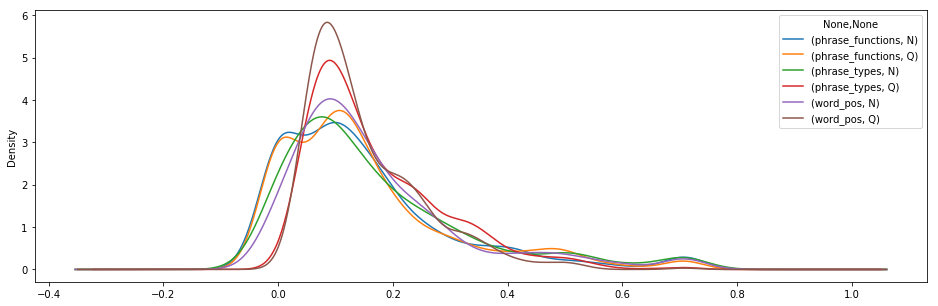

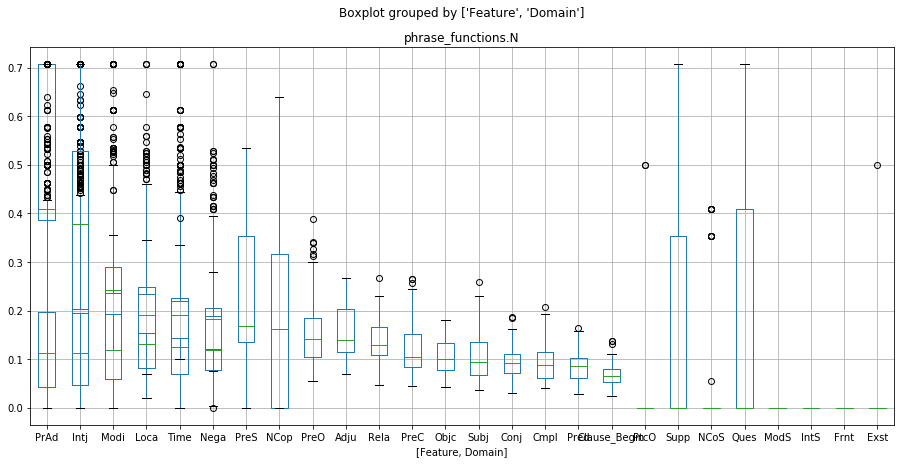

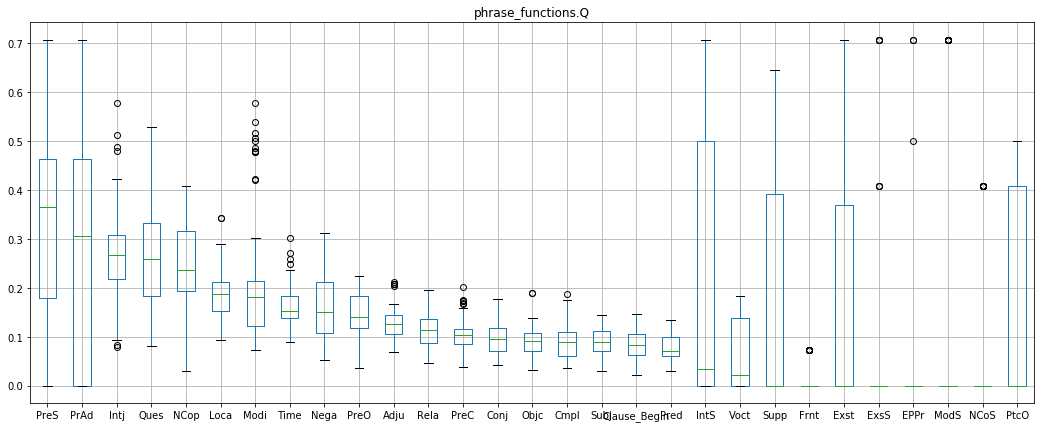

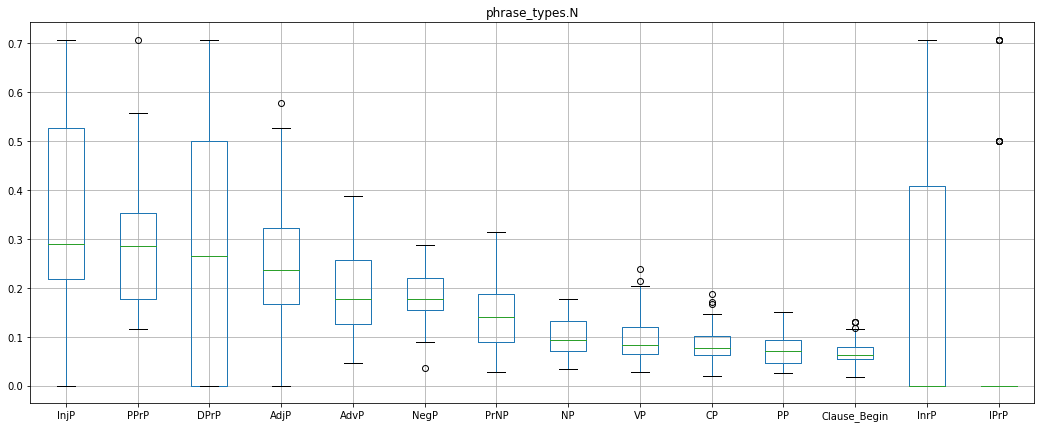

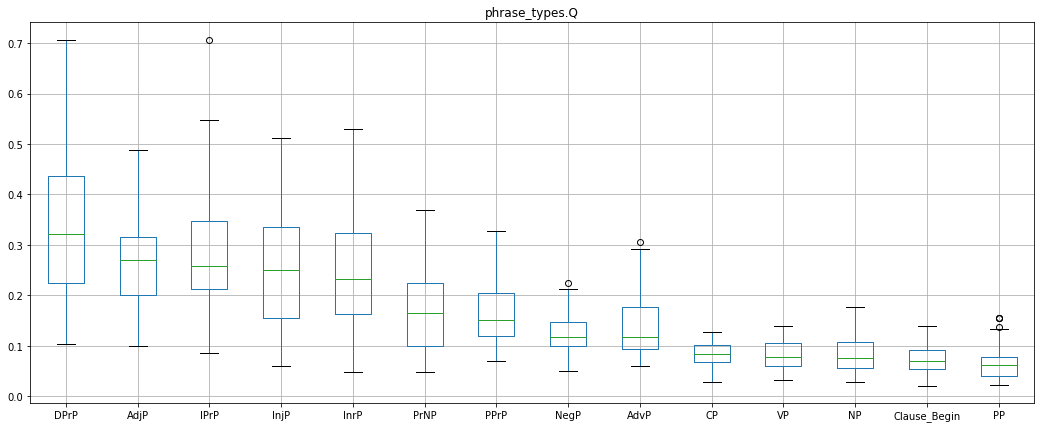

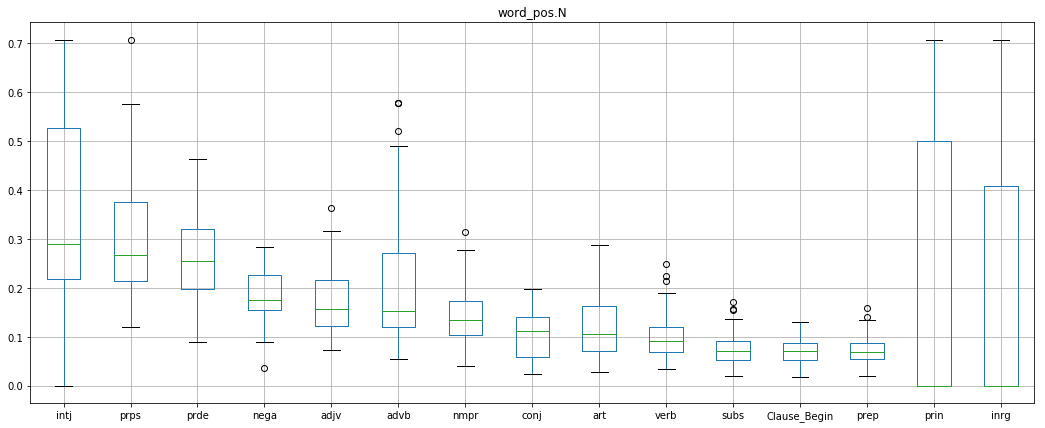

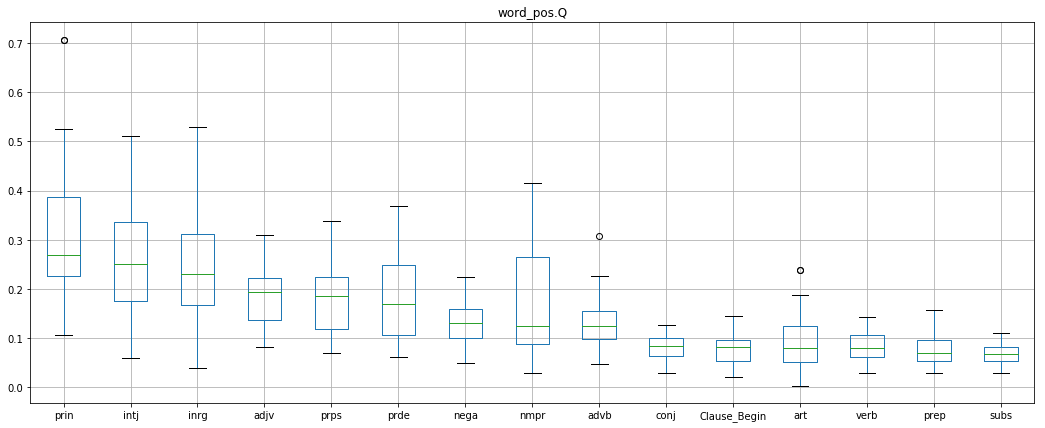

In [15]:
results = pd.DataFrame(m_distan, columns=["Feature","Domain","Book1","Book2","Item","Distance"]) 

k =  results.groupby("Item")["Distance"].mean()
results = results[results.Item.isin(k[k > 0].index)]

results.groupby(["Feature","Domain"])["Distance"].plot(kind="density", legend=True, figsize=(16,5))
results.boxplot(column = "Distance", by = ["Feature","Domain"], figsize = (15,7))


for f in select_features:
    for d in select_domains:
        #print(f, d)
        df = results[((results.Feature == f) & (results.Domain == d))]
        grouped = df.groupby(["Item"])
        df = pd.DataFrame({col:vals['Distance'] for col,vals in grouped})
        meds = df.median().sort_values(ascending=False)
        df[meds.index].boxplot(figsize = (18,7))
        plt.title(f'{f}.{d}')
        plt.show()

v = results[(results.Book1.isin(sbh_books)) & (results.Book2.isin(sbh_books))]
w = results[(results.Book1.isin(lbh_books)) & (results.Book2.isin(lbh_books))]

#v.Distance.mean()
#w.Distance.mean()
#v.Distance.std()
#w.Distance.std()

## Distance Between Distance Metrics

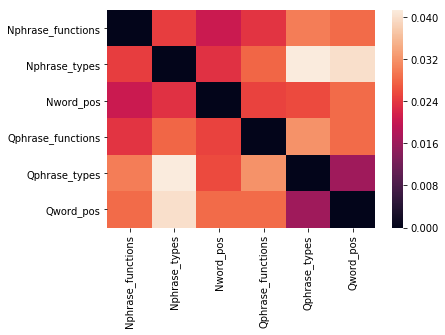

In [16]:
m_dataset_similarity = collections.defaultdict(dict)
x_dataset_similarity = collections.defaultdict(dict)

for dataset_distance, dataset_similarity in ((m_dataset_distance, m_dataset_similarity), (x_dataset_distance, x_dataset_similarity)): # both standard and experimental books
    for f1 in select_features:
        for d1 in select_domains:
            for f2 in select_features:
                for d2 in select_domains:
                    df1 = dataset_distance[f1][d1]
                    df2 = dataset_distance[f2][d2]
                    distance = np.mean(abs(df1.subtract(df2)).mean())
                    dataset_similarity[d1+f1][d2+f2] = distance

rowcol = ['Nphrase_functions', 'Nphrase_types', 'Nword_pos', 'Qphrase_functions', 'Qphrase_types', 'Qword_pos']
m_diff = pd.DataFrame(m_dataset_similarity, index=rowcol, columns=rowcol)

sns.heatmap(m_diff)

## Make Hierarchical Clusters

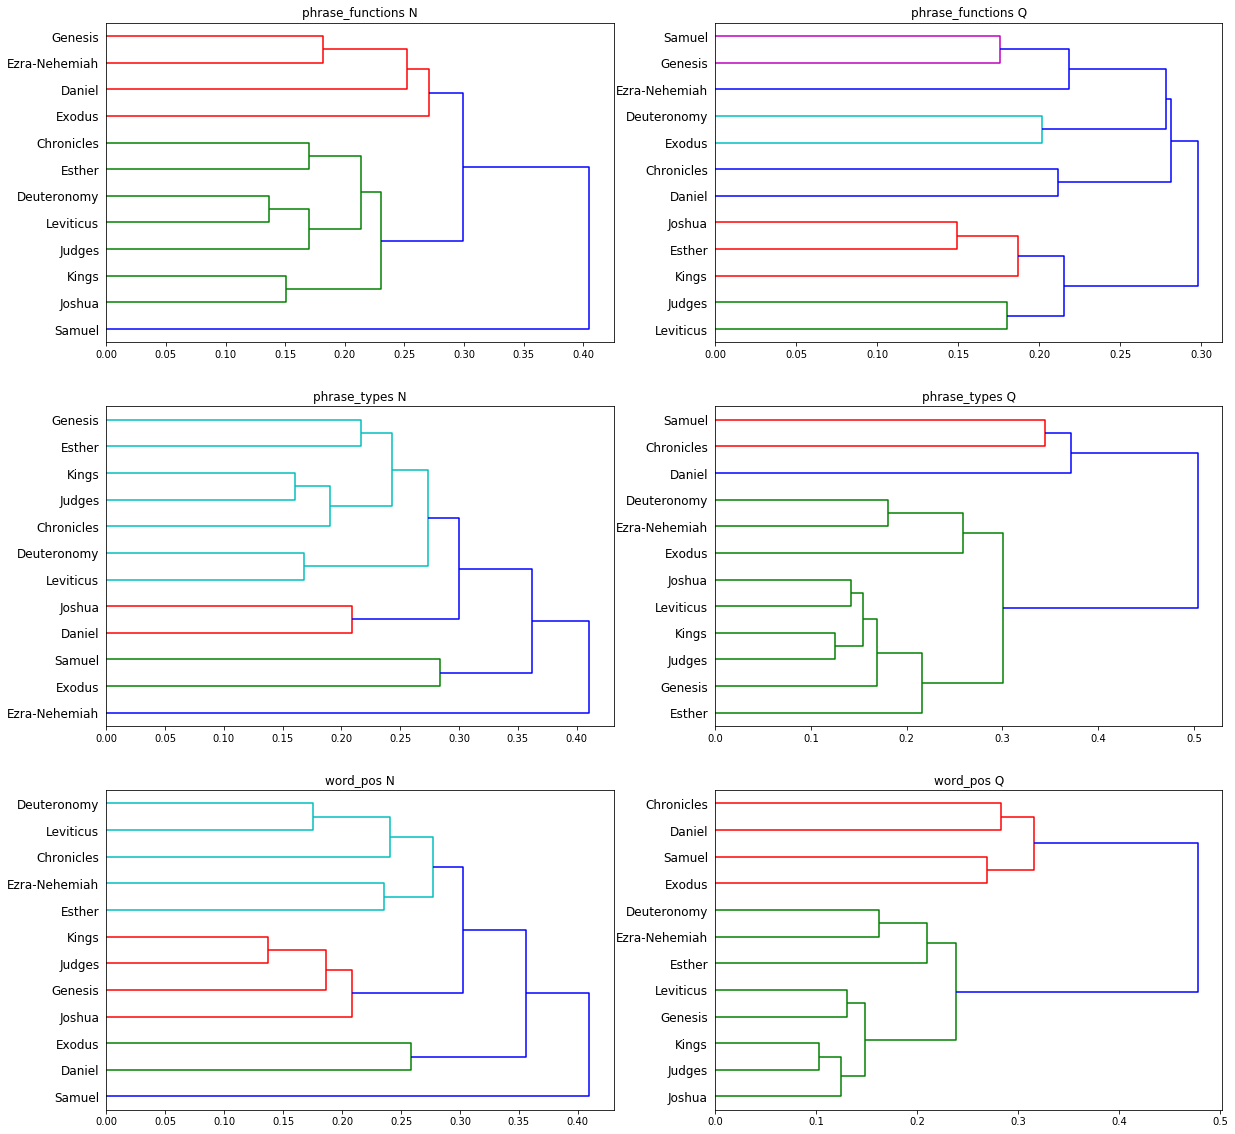

In [17]:
columns = len(select_domains)
rows = len(select_features)

# per individual 
plt.figure(101, figsize = (20,20))
i = 1
for f in select_features:
    for d in select_domains:
        plt.subplot(rows, columns, i)
        dm = m_dataset_distance[f][d]
        Z = linkageFunction(dm, "ward")
        hierarchy.dendrogram(Z,labels=m_dataset_distance[f][d].columns, orientation="right")
        plt.gca().set_title(f+" "+d)
        i = i +1

plt.show()

#### Composite Cluster

Cluster the books based on an average of all distances. 

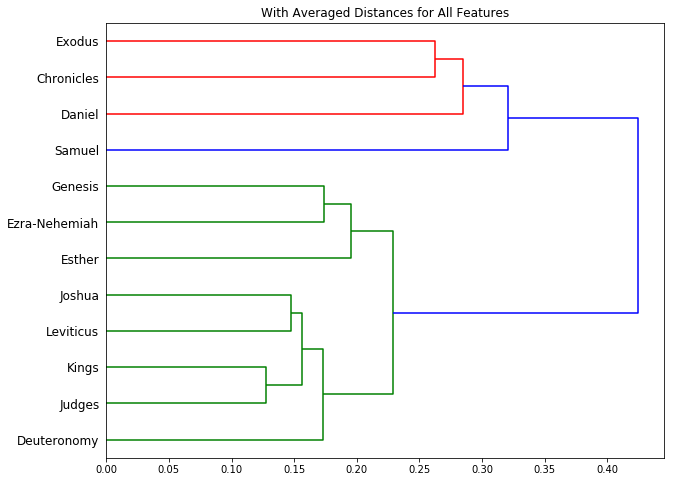

In [19]:
# overall
m_mean_distance = m_dataset_distance['phrase_functions']['N'].fillna(0) # average 
n = 1

for f in select_features:
    for d in select_domains:
        if not f == 'phrase_functions' and not d == "N":
            dm = m_dataset_distance[f][d]
            m_mean_distance = m_mean_distance.add(dm, fill_value=0)
            n += 1
            
m_mean_distance = m_mean_distance.div(n) # normalize
            
plt.figure(101, figsize=(10,8))
plt.title('With Averaged Distances for All Features')
Z = linkageFunction(m_mean_distance, 'ward')
hierarchy.dendrogram(Z, labels=m_mean_distance.columns, orientation="right")
plt.show()

Something is visible in this final, composite cluster which we did not see in the individual parts: two clearly distinct groups, one of which contains a majority of LBH books (red cluster), the other which contains SBH books (green cluster). We split these two groups apart to analyze their internal qualities. One thing we can see already is the the red cluster appears to contain more differences than the green cluster. We test that hypothesis below by splitting the two groups and gathering the average cluster distances between them.

## Examining Clusters of Experimental Books

Now we include the experimental books of Jonah, Ruth, Song of Songs, and Ecclesiastes to see what clusters form.

### Hierarchical Clusters (nested)

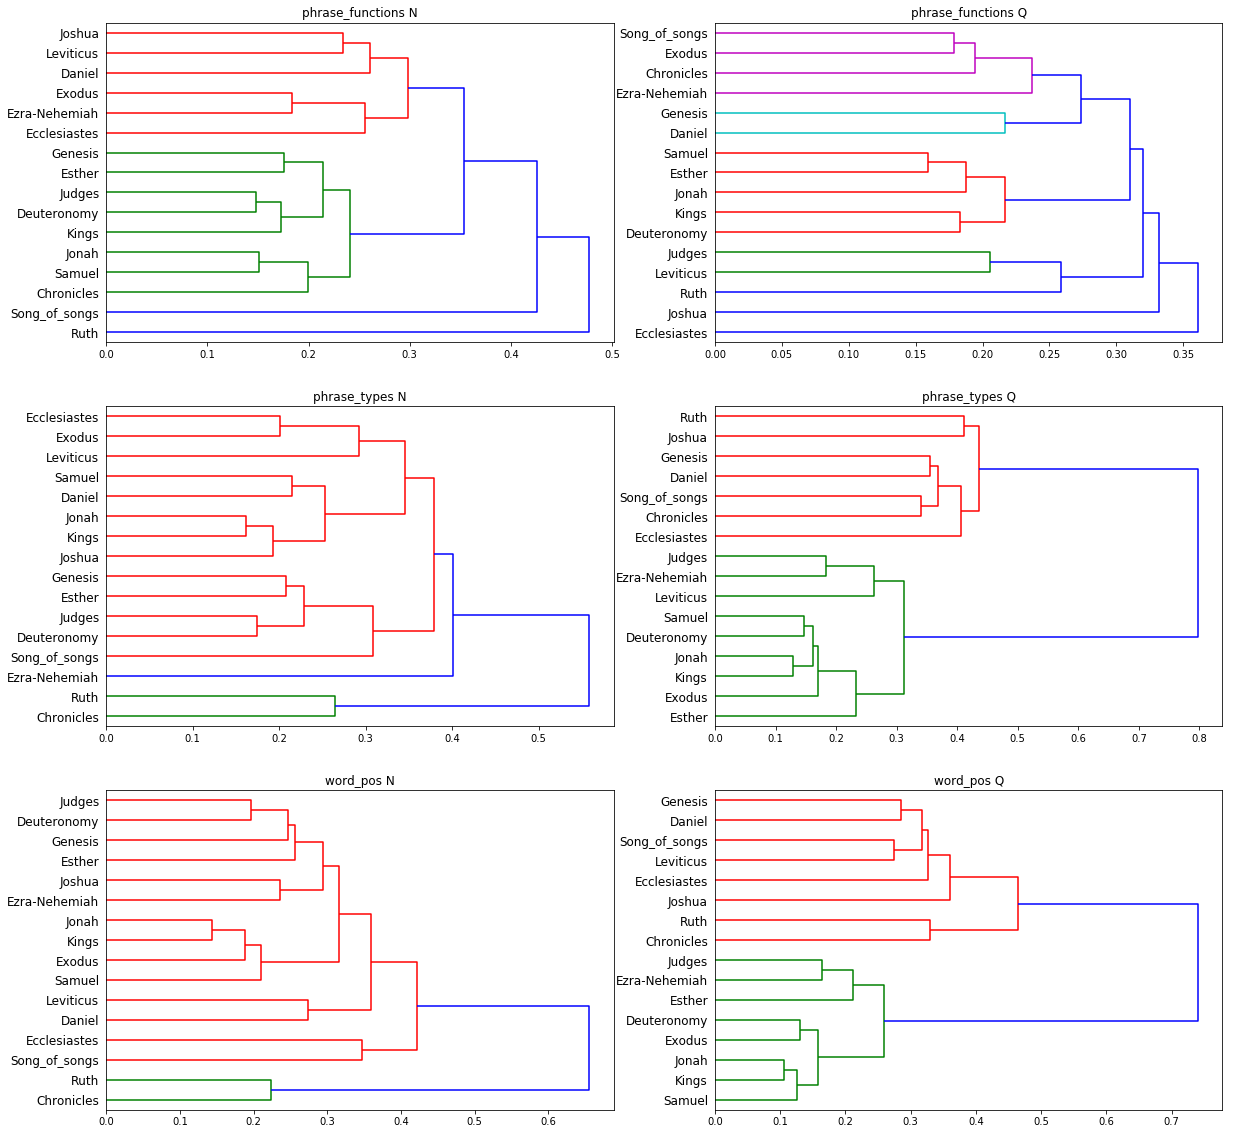

In [20]:
# per individual 
plt.figure(101, figsize = (20,20))
i = 1
for f in select_features:
    for d in select_domains:
        plt.subplot(rows, columns, i)
        dm = x_dataset_distance[f][d]
        Z = linkageFunction(dm, "ward")
        hierarchy.dendrogram(Z,labels=x_dataset_distance[f][d].columns, orientation="right")
        plt.gca().set_title(f+" "+d)
        i = i +1

plt.show()

### Composite Cluster

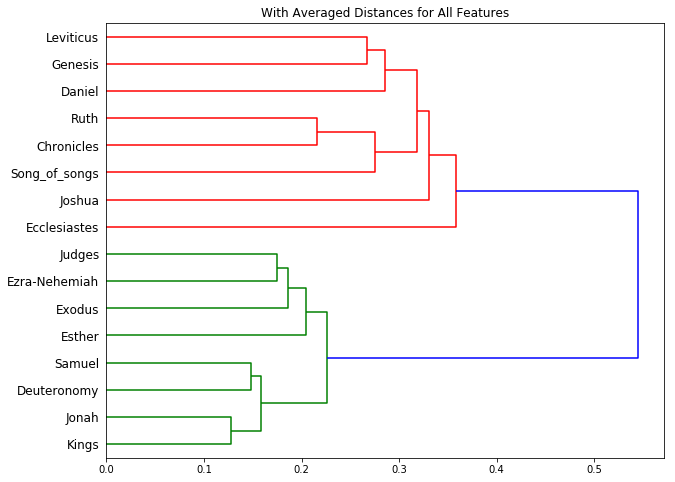

In [21]:
# overall
x_mean_distance = x_dataset_distance['phrase_functions']['N'].fillna(0) # average 
n = 1

for f in select_features:
    for d in select_domains:
        if not f == 'phrase_functions' and not d == "N":
            dm = x_dataset_distance[f][d]
            x_mean_distance = x_mean_distance.add(dm, fill_value=0)
            n += 1
            
x_mean_distance = x_mean_distance.div(n) # normalize
            
plt.figure(101, figsize=(10,8))
plt.title('With Averaged Distances for All Features')
Z = linkageFunction(x_mean_distance, 'ward')
hierarchy.dendrogram(Z, labels=x_mean_distance.columns, orientation="right")
plt.show()

In [19]:
from scipy.cluster.hierarchy import fcluster # flatten clusters 

cutoff = 0.4
clusters = fcluster(Z, cutoff, criterion='distance')

books_clustered = collections.defaultdict(list)
for i, cluster in enumerate(clusters):
    book = mean_distance.index[i]
    books_clustered[cluster].append(book)

books_clustered

defaultdict(list,
            {1: ['Chronicles',
              'Deuteronomy',
              'Ecclesiastes',
              'Exodus',
              'Genesis',
              'Joshua',
              'Judges',
              'Kings',
              'Samuel'],
             2: ['Daniel',
              'Esther',
              'Ezra-Nehemiah',
              'Leviticus',
              'Song_of_songs']})

In [45]:
mean_distance[books_clustered[2]].values.mean()

0.1535617249804408

In [46]:
mean_distance[books_clustered[1]].values.mean()

0.12728876589830002

We can see here that there is less similarity amongst the LBH books (group 2) as compared with the SBH groups.

## Determining Discriminatory Features

Here we seek to find the most telling features of the two clusters.

In [47]:
clustered_diffs = collections.defaultdict(lambda: collections.Counter())

for cluster, books in books_clustered.items():
    
    feat_counts = collections.Counter()
    
    for i in range(0, len(books)):
        for j in range(0, len(books)):
            feat_counts.update(book_feat_distance[books[i]][books[j]])
            
    feat_counts = pd.DataFrame.from_dict(feat_counts, orient='index')
    feat_counts = feat_counts / len(books)**2 # obtain average
    
    clustered_diffs[cluster] = feat_counts

In [48]:
top_clust1 = clustered_diffs[1].sort_values(0)[12:].head(20)
top_clust2 = clustered_diffs[2].sort_values(0)[12:].head(20)

In [49]:
set(top_clust2.index) - set(top_clust1.index)

{'phrase_functions.N.Exst',
 'phrase_functions.N.NCoS',
 'phrase_functions.N.Pred',
 'phrase_functions.N.Ques',
 'phrase_functions.Q.Clause_End',
 'phrase_functions.Q.Exst',
 'phrase_functions.Q.Frnt',
 'phrase_types.N.AdjP',
 'phrase_types.N.InrP',
 'word_pos.N.Clause_End',
 'word_pos.N.inrg',
 'word_pos.N.prin'}

In [50]:
set(top_clust1.index) - set(top_clust2.index)

{'phrase_functions.N.PtcO',
 'phrase_functions.Q.Clause_Begin',
 'phrase_functions.Q.EPPr',
 'phrase_functions.Q.ExsS',
 'phrase_types.N.CP',
 'phrase_types.Q.Clause_Begin',
 'phrase_types.Q.NP',
 'phrase_types.Q.PP',
 'phrase_types.Q.VP',
 'word_pos.Q.Clause_Begin',
 'word_pos.Q.prep',
 'word_pos.Q.subs'}

In [51]:
dataset_MC['phrase_types']['Q']['Ezra-Nehemiah'].loc['InrP']

CP              0.000000
PPrP            0.055556
InjP            0.000000
AdjP            0.000000
VP              0.500000
DPrP            0.000000
Clause_Begin    0.000000
PP              0.055556
PrNP            0.000000
InrP            0.000000
NegP            0.277778
Clause_End      0.000000
AdvP            0.000000
NP              0.111111
IPrP            0.000000
Name: InrP, dtype: float64

In [52]:
dataset_MC['phrase_types']['Q']['Genesis'].loc['InrP']

CP              0.020408
PPrP            0.040816
InjP            0.000000
AdjP            0.010204
VP              0.367347
DPrP            0.010204
Clause_Begin    0.000000
PP              0.081633
PrNP            0.020408
InrP            0.000000
NegP            0.142857
Clause_End      0.010204
AdvP            0.132653
NP              0.163265
IPrP            0.000000
Name: InrP, dtype: float64

In [53]:
dataset_MC['phrase_types']['Q']['Daniel'].loc['InrP']

CP              0.0
PPrP            0.0
InjP            0.0
AdjP            0.0
VP              1.0
DPrP            0.0
Clause_Begin    0.0
PP              0.0
PrNP            0.0
InrP            0.0
NegP            0.0
Clause_End      0.0
AdvP            0.0
NP              0.0
IPrP            0.0
Name: InrP, dtype: float64

### Looking for Correlations between Sum of Distance and Size of Samples

In [54]:
book_distances = collections.Counter()
book_sizes = dict((book, len(clauses)) 
                      for book, clauses in dataset['phrase_functions']['Q'].items())

for feature, domains in dataset_distance.items():
    for domain, dist_matrix in domains.items():
        dists = dist_matrix.sum()
        book_distances.update(dists.to_dict())
        
book_size_dist = tuple((book_size, book_distances[book]) for book, book_size in book_sizes.items())

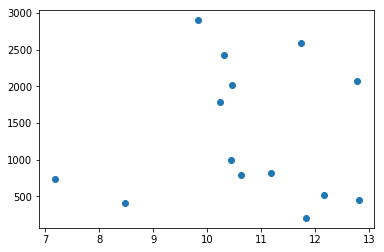

In [55]:
plt.scatter(x=[b[1] for b in book_size_dist], y=[b[0] for b in book_size_dist])

### Explaining Distance Amongst LBH Compared to SBH

In [56]:
sbh_results = results[results.Book1.isin(books_clustered[1]) & results.Book2.isin(books_clustered[1])]
lbh_results = results[results.Book1.isin(books_clustered[2]) & results.Book2.isin(books_clustered[2])]

del sbh_results['Book1']
del sbh_results['Book2']
del lbh_results['Book1']
del lbh_results['Book2']

#### Feature Distances by SBH and LBH (normalized to maximum distance)

In [57]:
sbh_res = sbh_results.groupby(['Feature', 'Domain']).mean()

sbh_res / sbh_res.Distance.max()

Distance
Feature          Domain          
phrase_functions N       0.794997
                 Q       0.888183
phrase_types     N       1.000000
                 Q       0.768280
word_pos         N       0.864683
                 Q       0.673243

In [58]:
lbh_res = lbh_results.groupby(['Feature', 'Domain']).mean()

lbh_res / lbh_res.Distance.max()

Distance
Feature          Domain          
phrase_functions N       0.768378
                 Q       0.631939
phrase_types     N       0.704716
                 Q       1.000000
word_pos         N       0.825574
                 Q       0.889676

While the distances in SBH are more or less evenly spread, the distances in LBH peak with the Q phrase types and word part of speech features. 

In [59]:
lbh_res2 = lbh_results[lbh_results.Feature.str.contains('phrase_types') & lbh_results.Domain.str.contains('Q')]

lbh_res2.groupby(['Feature', 'Domain', 'Item']).mean().Distance.sort_values(ascending=False)

Feature       Domain  Item        
phrase_types  Q       DPrP            0.470927
                      IPrP            0.424473
                      InrP            0.396136
                      InjP            0.390359
                      PrNP            0.299364
                      AdjP            0.266614
                      PPrP            0.259990
                      AdvP            0.207737
                      NegP            0.143698
                      CP              0.114892
                      NP              0.109993
                      Clause_Begin    0.106300
                      PP              0.093335
                      VP              0.092726
Name: Distance, dtype: float64

The most differences seem to stem from `InjP`, `DPrP`, `IPrP`, and `InrP` phrase types. 

## Feature Heat-Maps with K-Medoids

phrase_functions N
-0.10245430936779742


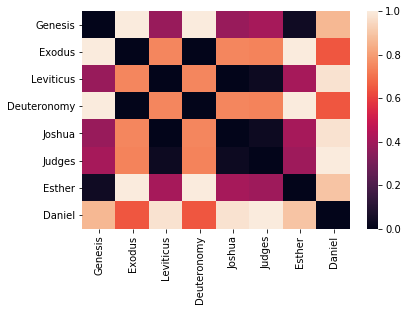

phrase_functions Q
0.05523538921896111


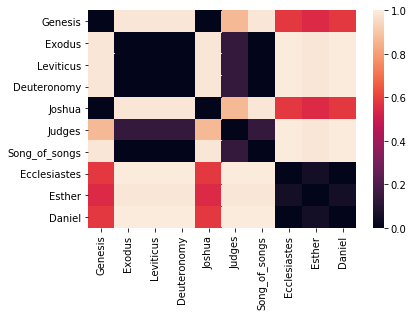

phrase_types N
-0.05163582580023604


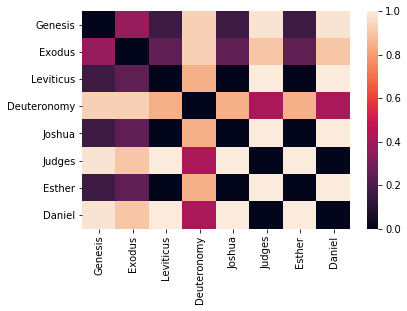

phrase_types Q
0.07072722935769772


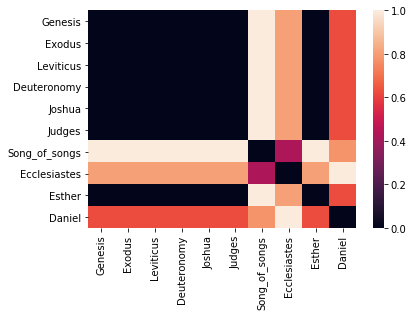

word_pos N
0.07229565877086212


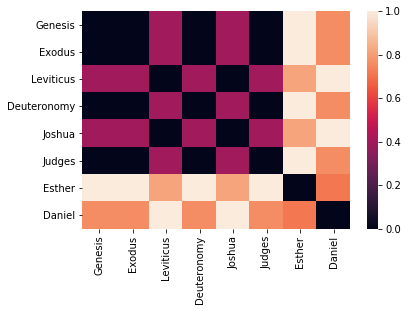

word_pos Q
0.2323071109634494


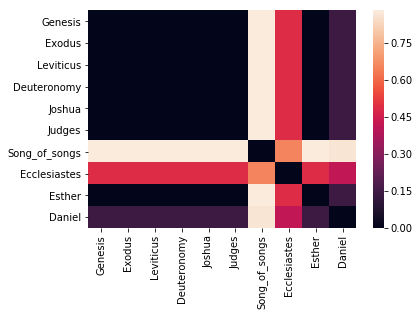

In [60]:
# =============================================================================
# Kmediods
# =============================================================================

book_order = sbh_books + lbh_books

for f in select_features:
    for d in select_domains:
        print(f,d)
        dm = dataset_distance[f][d]
        
        scores = pd.DataFrame(np.zeros((100, len(dm.columns))), columns=dm.columns)
        sil_sc = []
        
        for i in range(0, 1000):
            M, C = kMedoids(np.array(dm), 2, tmax = 1000)
            
            for label, value in C.items():
                books = list(dm.index[value])
                for book in books:
                    scores.loc[i, book] = label   
            
            sil = silhouette_score(dm, labels=scores.loc[i,], metric='precomputed')
            sil_sc.append(sil)

        print(np.max(sil_sc))
                    
        agreements = pdist(scores.T, 'jaccard')
        ag = pd.DataFrame(squareform(agreements), index=dm.columns, columns=dm.columns)
        order = [a for a in book_order if a in dm.columns]
        ag = ag[order]
        ag = ag.reindex(index = order)

        sns.heatmap(ag)
        plt.show()